#### Load Libraries

In [130]:
# For Data Analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle Warnings
import warnings
warnings.filterwarnings('ignore')

In [131]:
# ML Models and Evaluation Metrics

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, f1_score, RocCurveDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

#### Load Dataset

Scource of Dataset is: <b>Kaggle</b> [Download Here..](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download)

In [132]:
# Load Dataset

df = pd.read_csv('data/heart.csv')

In [133]:
# See the first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [134]:
# See the last 5 rows of the dataset
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


#### Metadata (Column Details)

1. age: Age in Years of patient
2. sex: Gender
3. cp: Chest Pain
4. trestbps: Resting Blood Pressure (in Hg) on admission to the hospital
5. chol: Cholestroal in mg/dl
6. fbs: Fasting Blood Sugar in mg/dl (If fbs greater then 120: True: 1, False: 0)
7. restecg: Resting Electrocardiographic (ECG) Results
8. thalach: Maximum Heart Rate
9. exang: Excersise induced Angina (1: Yes, 0: No)
10. oldpeak: ST Depression induced by excersise relative to rest
11. slope: The slope of the peak exercise ST segment
12. ca: Number of major vessels (0-3) colored by Flourosopy
13. thal: Thalassemia/Stress Test Result 0 = Normal, 1 = Fixed Defect, 2 = Reversable Defect
14. target: Is disease or not 1: Yes, 0: No

- ST: It's refers to a specific part of an ECG (Electrocardiogram) tracing.

In [135]:
# Set Column Names

df.columns = ['Age', 'Gender', 'ChestPain', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'MajorVessels', 'ThalassemiaTest', 'Target']

In [136]:
# Check sample data
df.sample(5)

,Age,Gender,ChestPain,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,MajorVessels,ThalassemiaTest,Target
997,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
634,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
584,55,1,0,132,353,0,1,132,1,1.2,1,1,3,0
896,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
363,53,1,2,130,246,1,0,173,0,0.0,2,3,2,1


#### Basic Information

In [137]:
# Check the shape of the dataset
rows, cols = df.shape
print(f'The dataset contains {rows} rows and {cols} columns.')

The dataset contains 1025 rows and 14 columns.


In [138]:
# Get basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              1025 non-null   int64  
 1   Gender           1025 non-null   int64  
 2   ChestPain        1025 non-null   int64  
 3   RestingBP        1025 non-null   int64  
 4   Cholesterol      1025 non-null   int64  
 5   FastingBS        1025 non-null   int64  
 6   RestingECG       1025 non-null   int64  
 7   MaxHR            1025 non-null   int64  
 8   ExerciseAngina   1025 non-null   int64  
 9   Oldpeak          1025 non-null   float64
 10  ST_Slope         1025 non-null   int64  
 11  MajorVessels     1025 non-null   int64  
 12  ThalassemiaTest  1025 non-null   int64  
 13  Target           1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [139]:
# Check missing values
df.isnull().sum()

Age                0
Gender             0
ChestPain          0
RestingBP          0
Cholesterol        0
FastingBS          0
RestingECG         0
MaxHR              0
ExerciseAngina     0
Oldpeak            0
ST_Slope           0
MajorVessels       0
ThalassemiaTest    0
Target             0
dtype: int64

In [140]:
# Check duplicate rows
df.duplicated().sum()

np.int64(723)

##### Duplicates
There are huge no of duplicated data, that's are not suitable for our ML model training and analysis. So, I'll drop all duplicated data.

In [141]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [142]:
# Check shape after dropping duplicates
rows, cols = df.shape
print(f'After dropping duplicates, the dataset contains {rows} rows and {cols} columns')

After dropping duplicates, the dataset contains 302 rows and 14 columns


In [143]:
# Seprate Discrete(Categorical) and Continuous Features

disc_feat = [var for var in df.columns if df[var].value_counts().count() < 15 and var != "Target"]
count_feat = [var for var in df.columns if var not in disc_feat and var != "Target"]
target_feat = df['Target']

In [144]:
# Get Statistical Summary of continuous features
df[count_feat].describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


#### Univariate Analysis

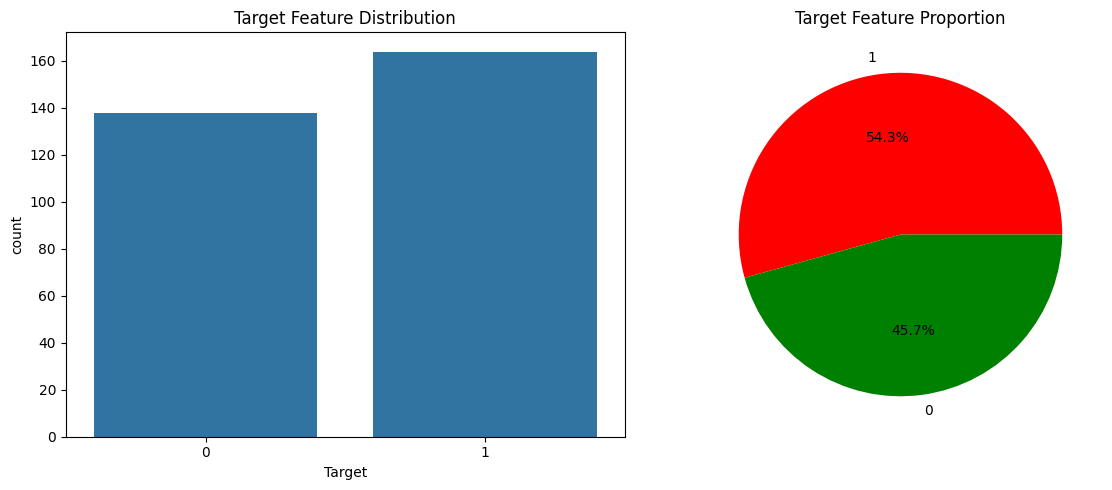

In [145]:
# Target Feature Distribution

fig, axes = plt.subplots(1, 2, figsize=(12, 5))


# Count values in Target Feature
sns.countplot(x='Target', data=df, ax=axes[0])
axes[0].set_title('Target Feature Distribution')


# Pie chart for Target Feature
target_counts = df['Target'].value_counts()
axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=['red','green'])
axes[1].set_title('Target Feature Proportion')

plt.tight_layout()
plt.show()

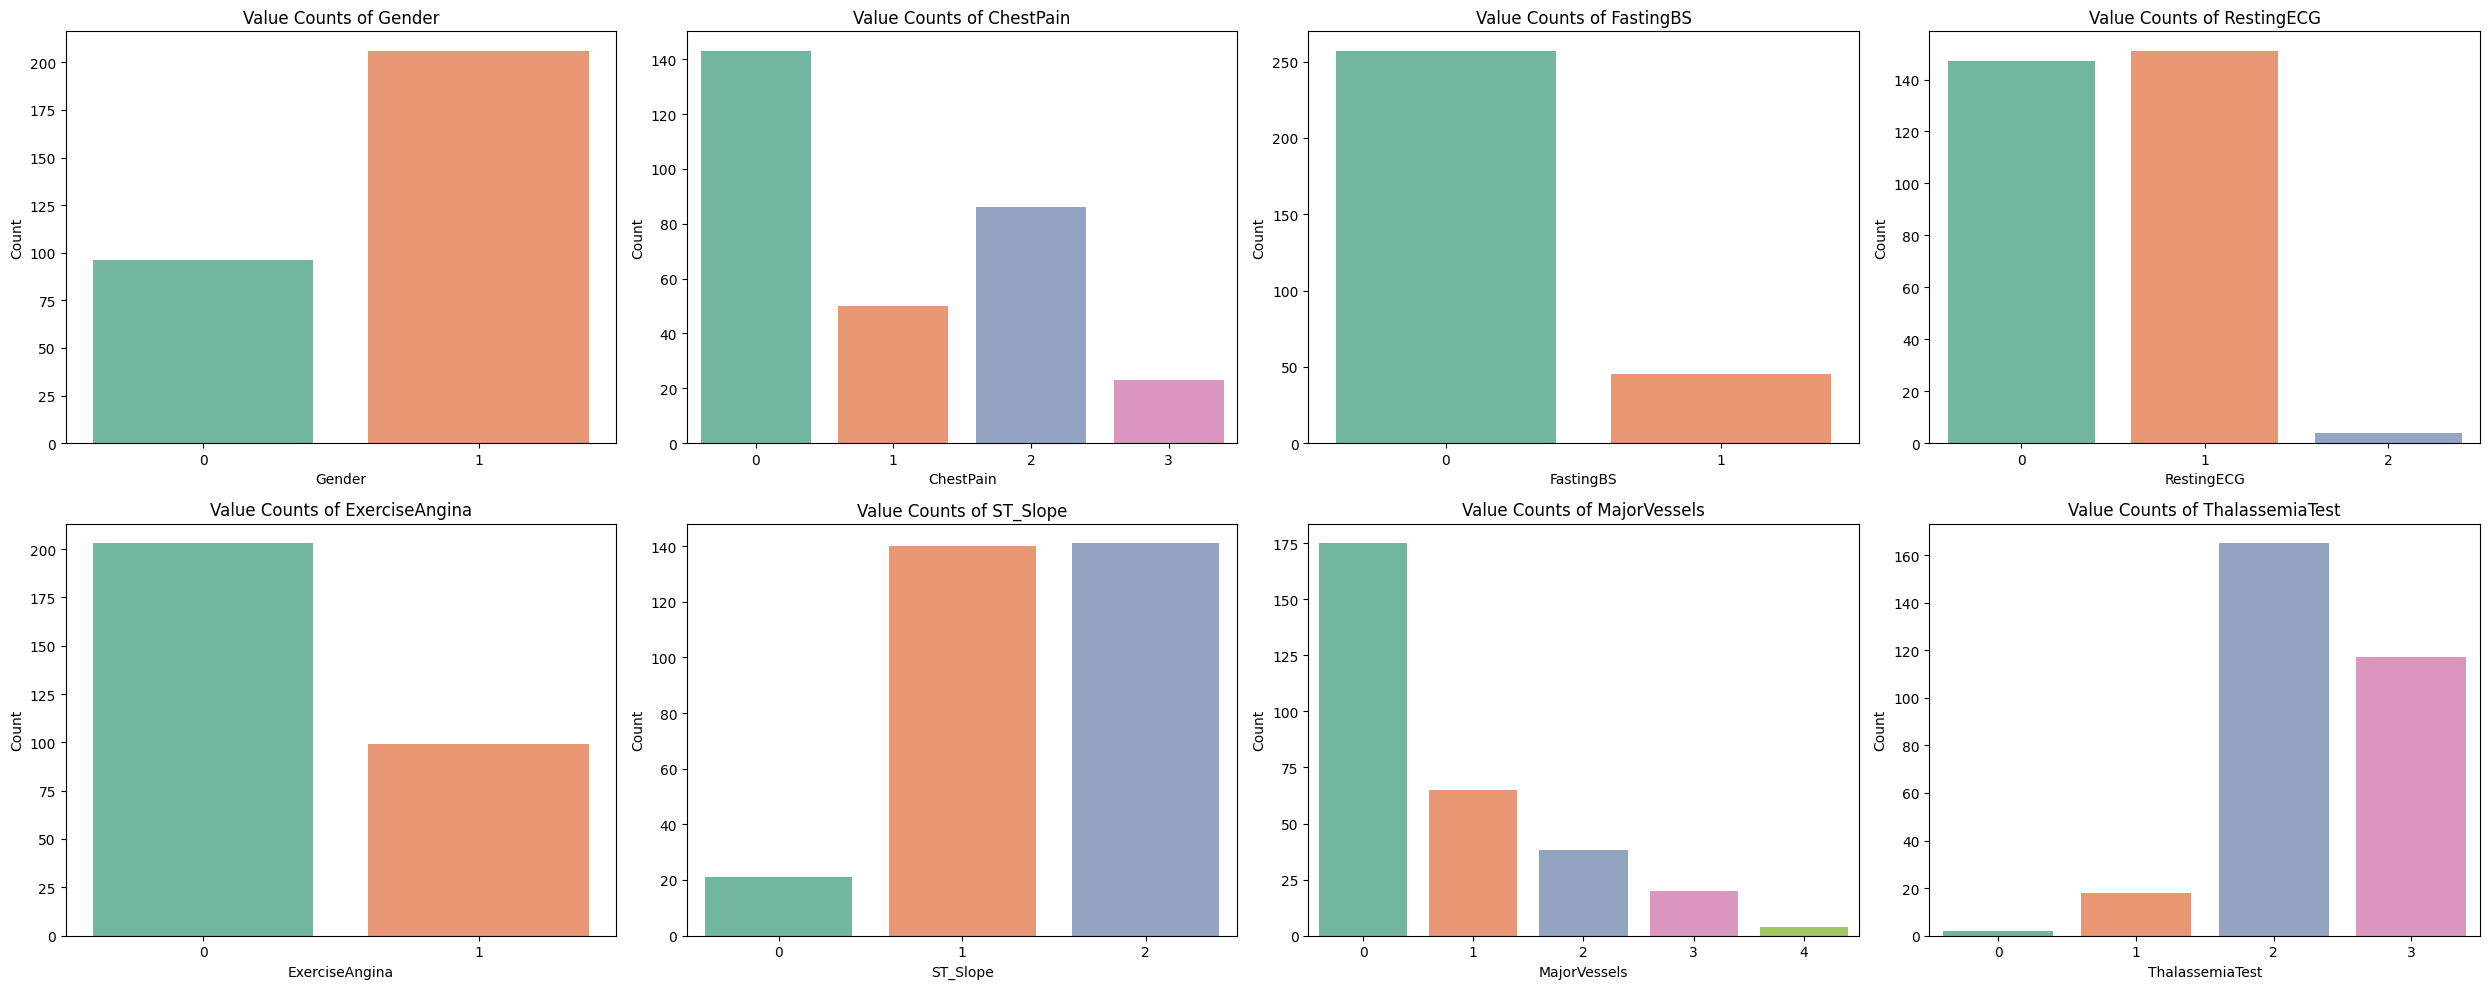

In [146]:
# Count unique values in discrete features

plt.figure(figsize=(25,10))

for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    sns.countplot(x=df[var], palette='Set2')
    plt.title(f'Value Counts of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

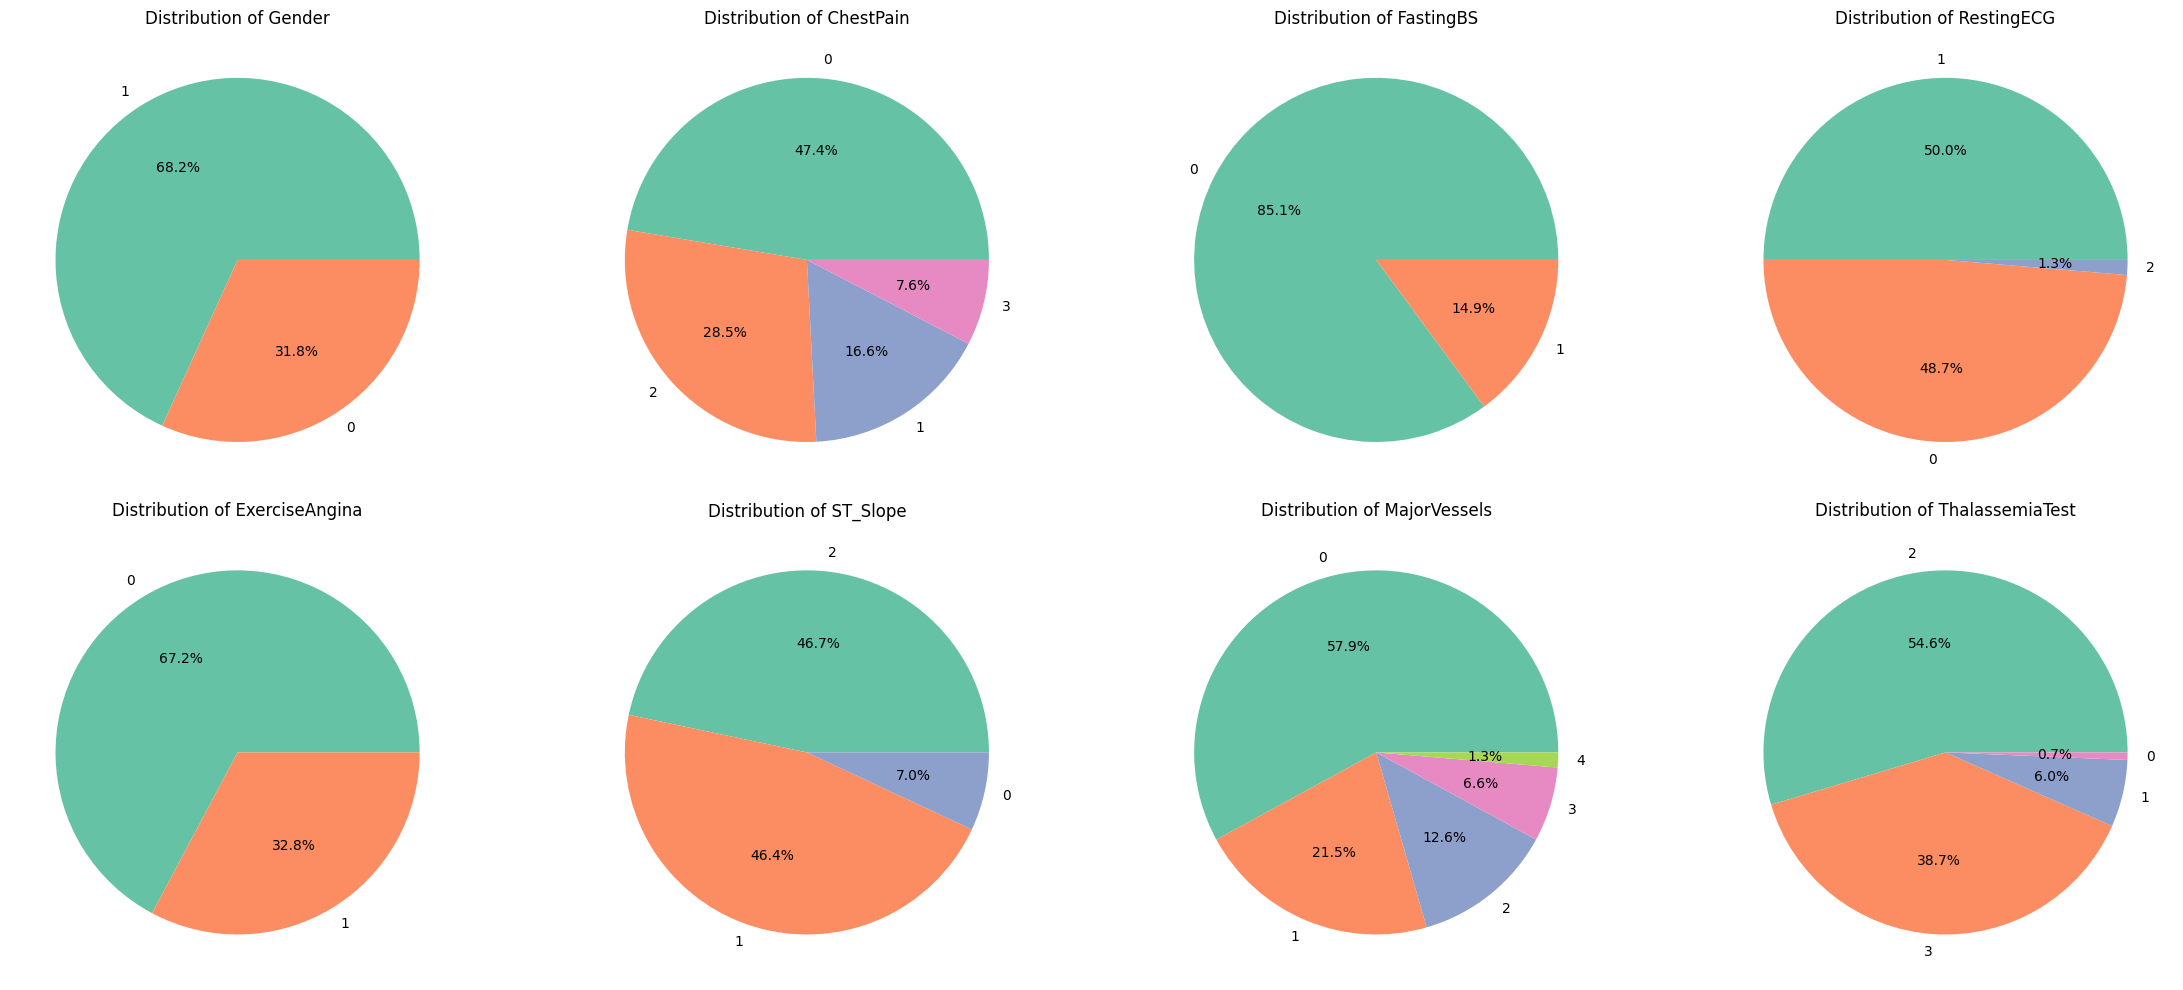

In [147]:
# Get Distribution % of discreate features
plt.figure(figsize=(25,10))


for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    plt.pie(df[var].value_counts(), labels=df[var].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title(f'Distribution of {var}')
    plt.tight_layout()

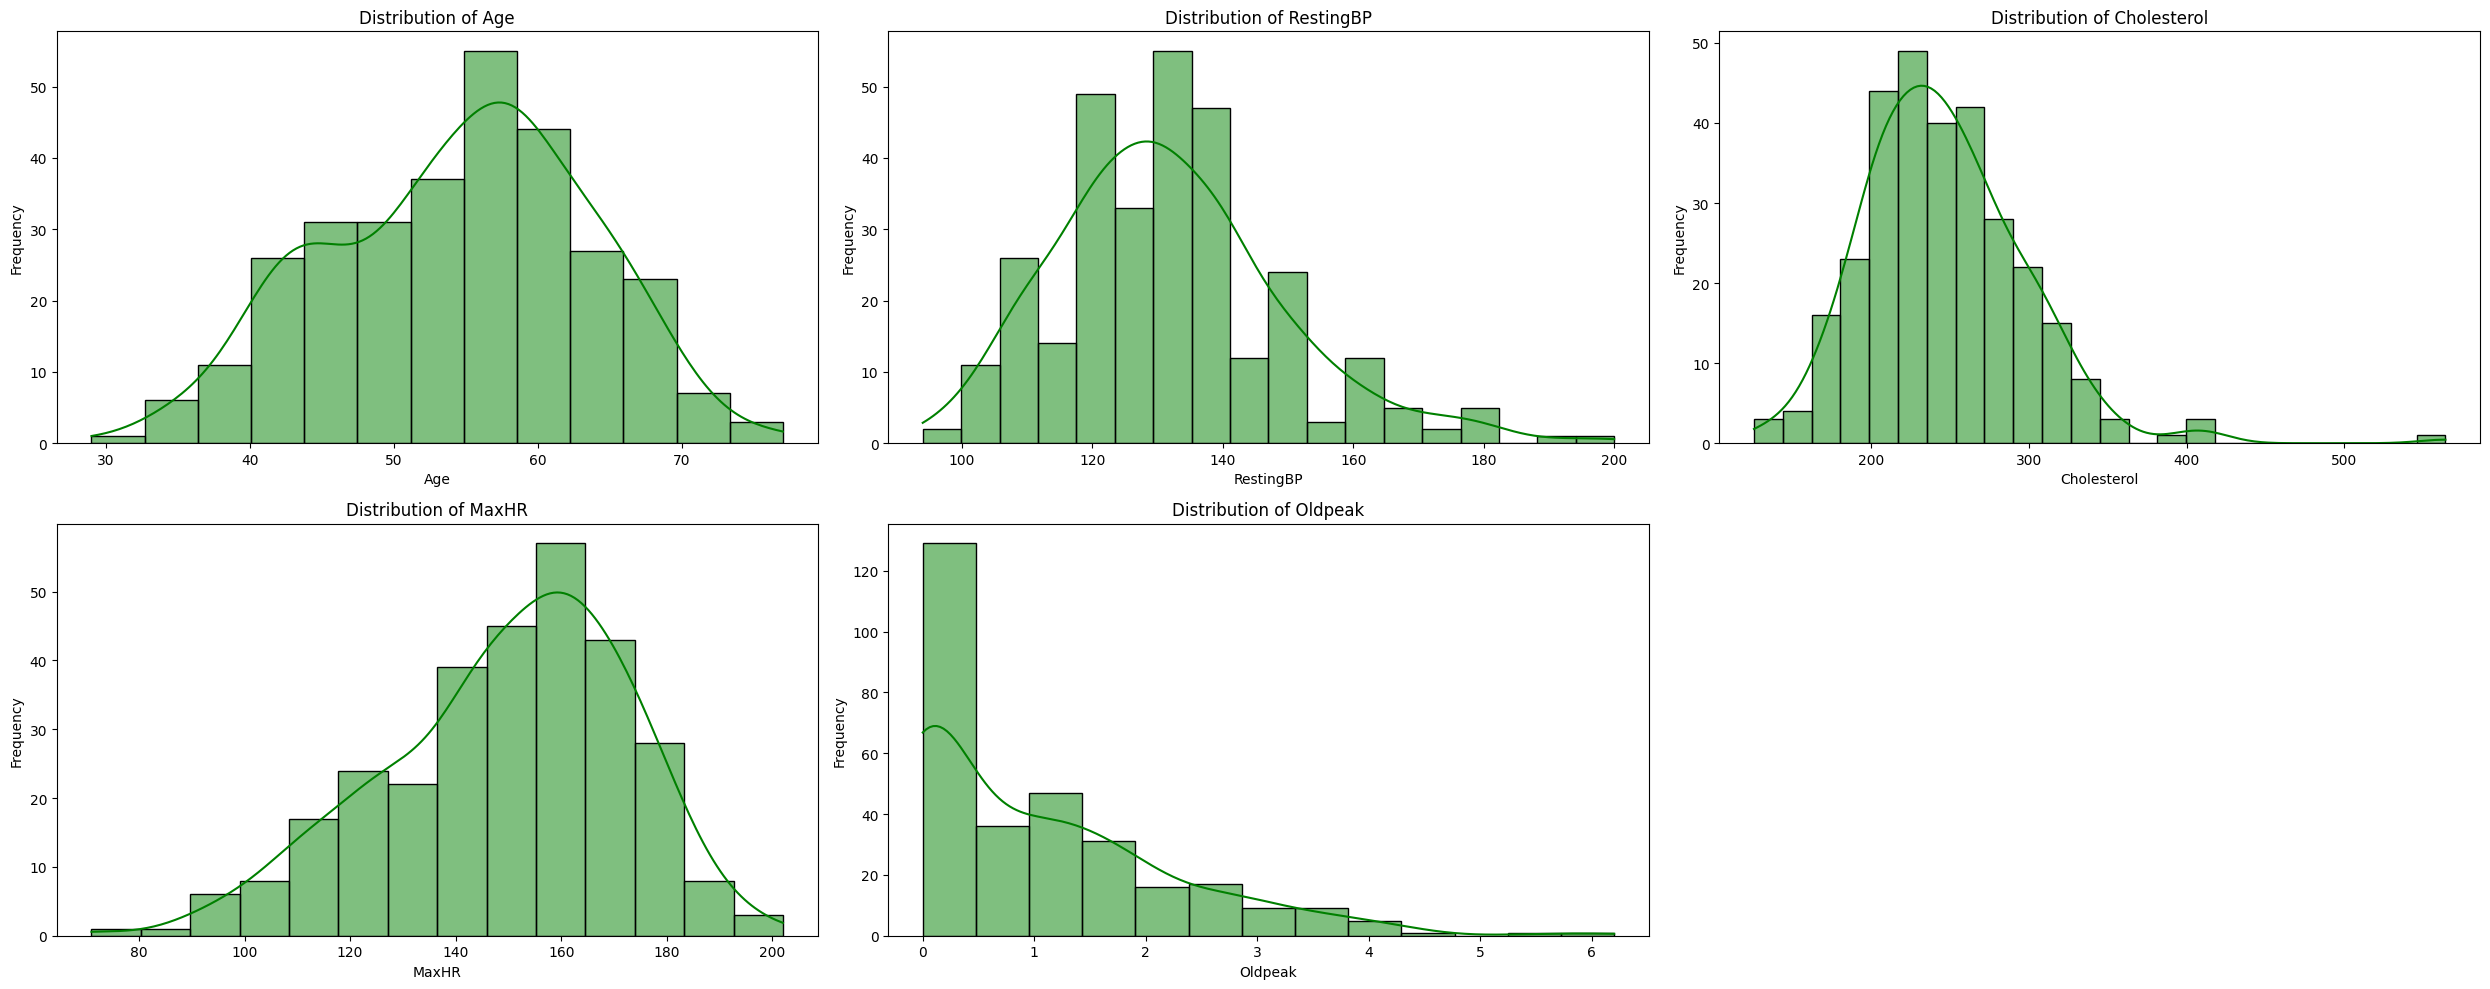

In [148]:
# distribution of continuous features

plt.figure(figsize=(25,10))

for i, var in enumerate(count_feat):
    plt.subplot(2,3, i+1)
    sns.histplot(df[var], kde=True, color='green')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.tight_layout()

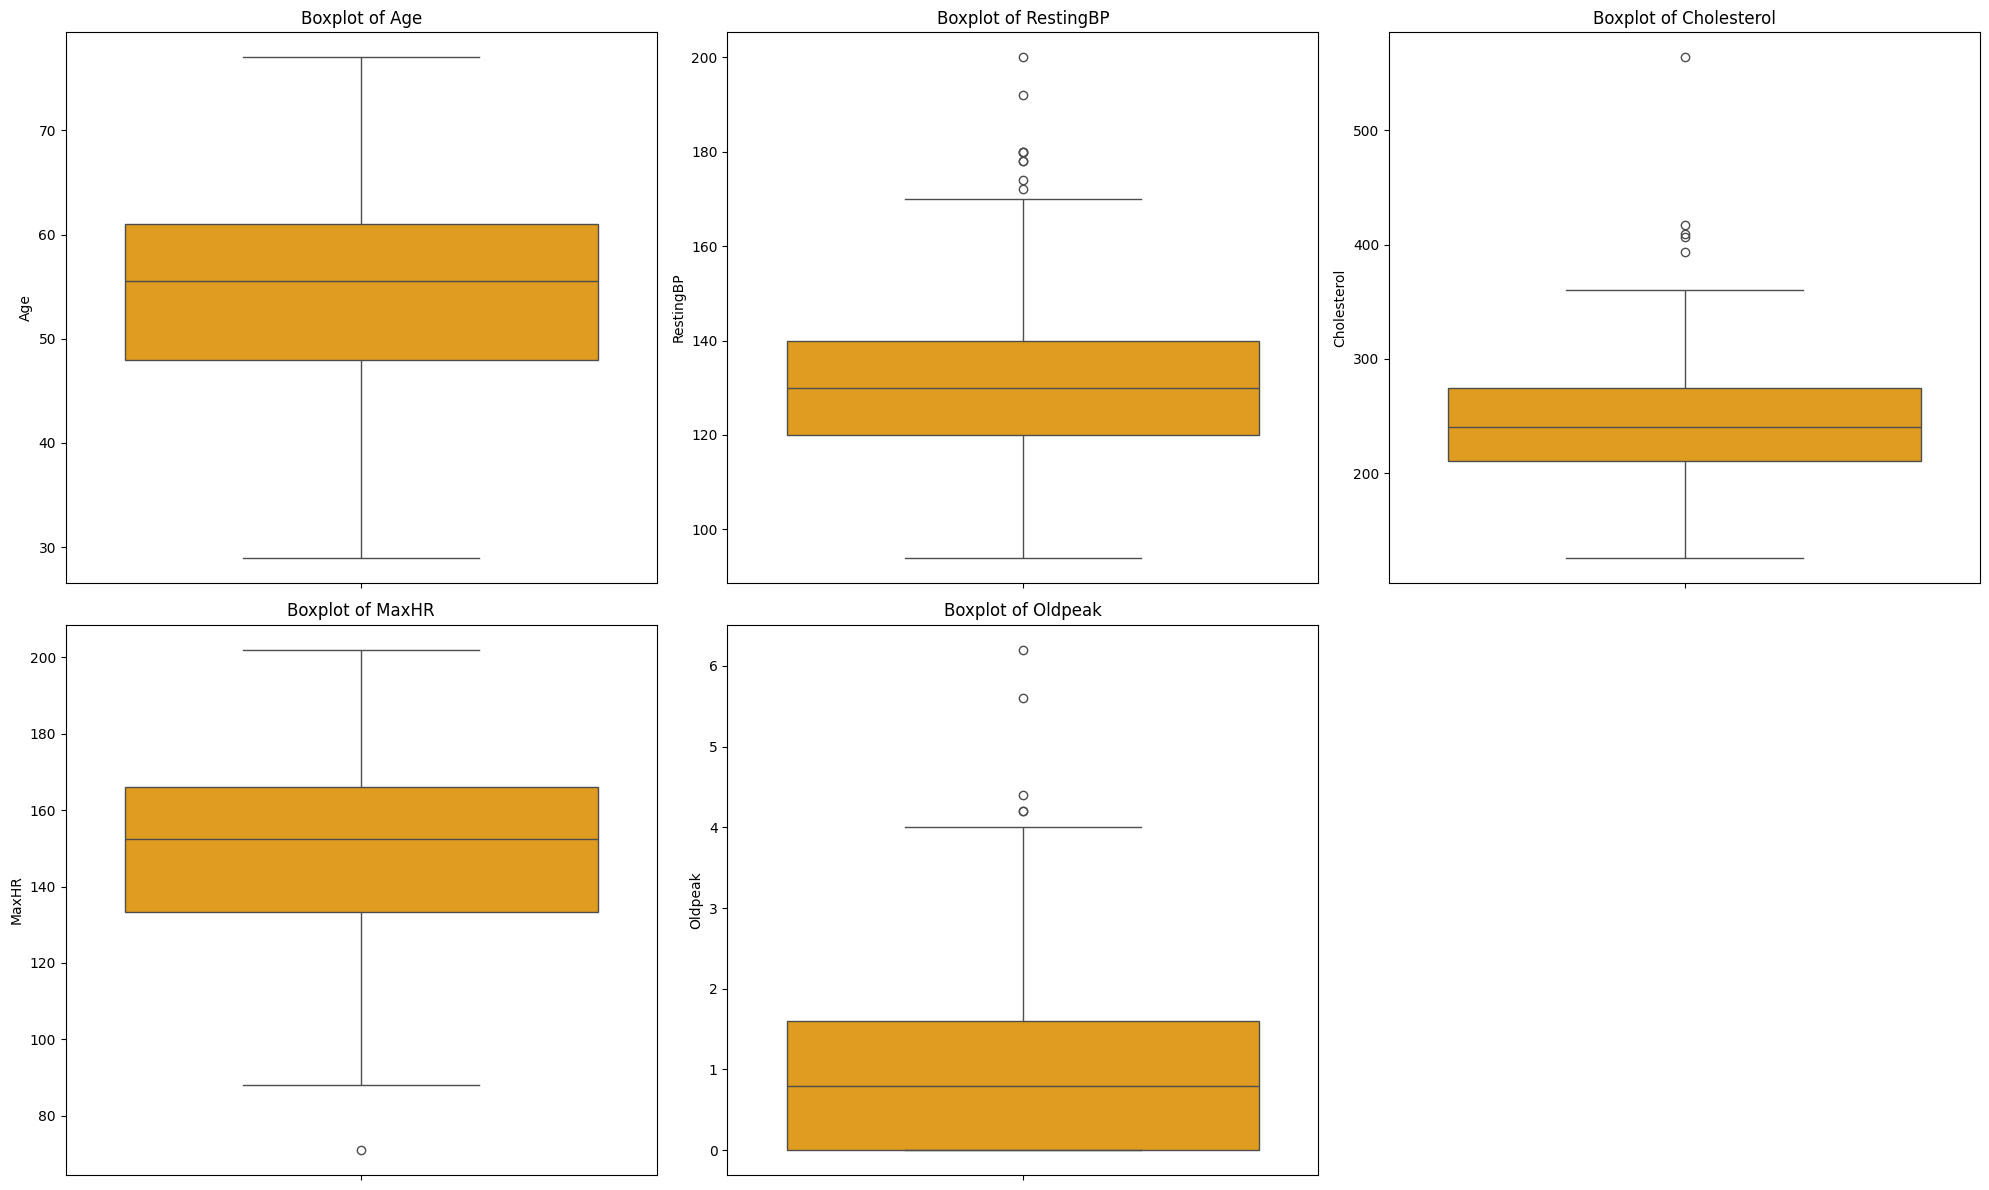

In [149]:
# Outliers Detection
plt.figure(figsize=(20,12))

for i, var in enumerate(count_feat):
    plt.subplot(2,3, i+1)
    sns.boxplot(y=df[var], color='orange', orient='h')
    plt.title(f'Boxplot of {var}')
    plt.ylabel(var)
    plt.tight_layout()

#### Bivariate and Mutivariate Analysis

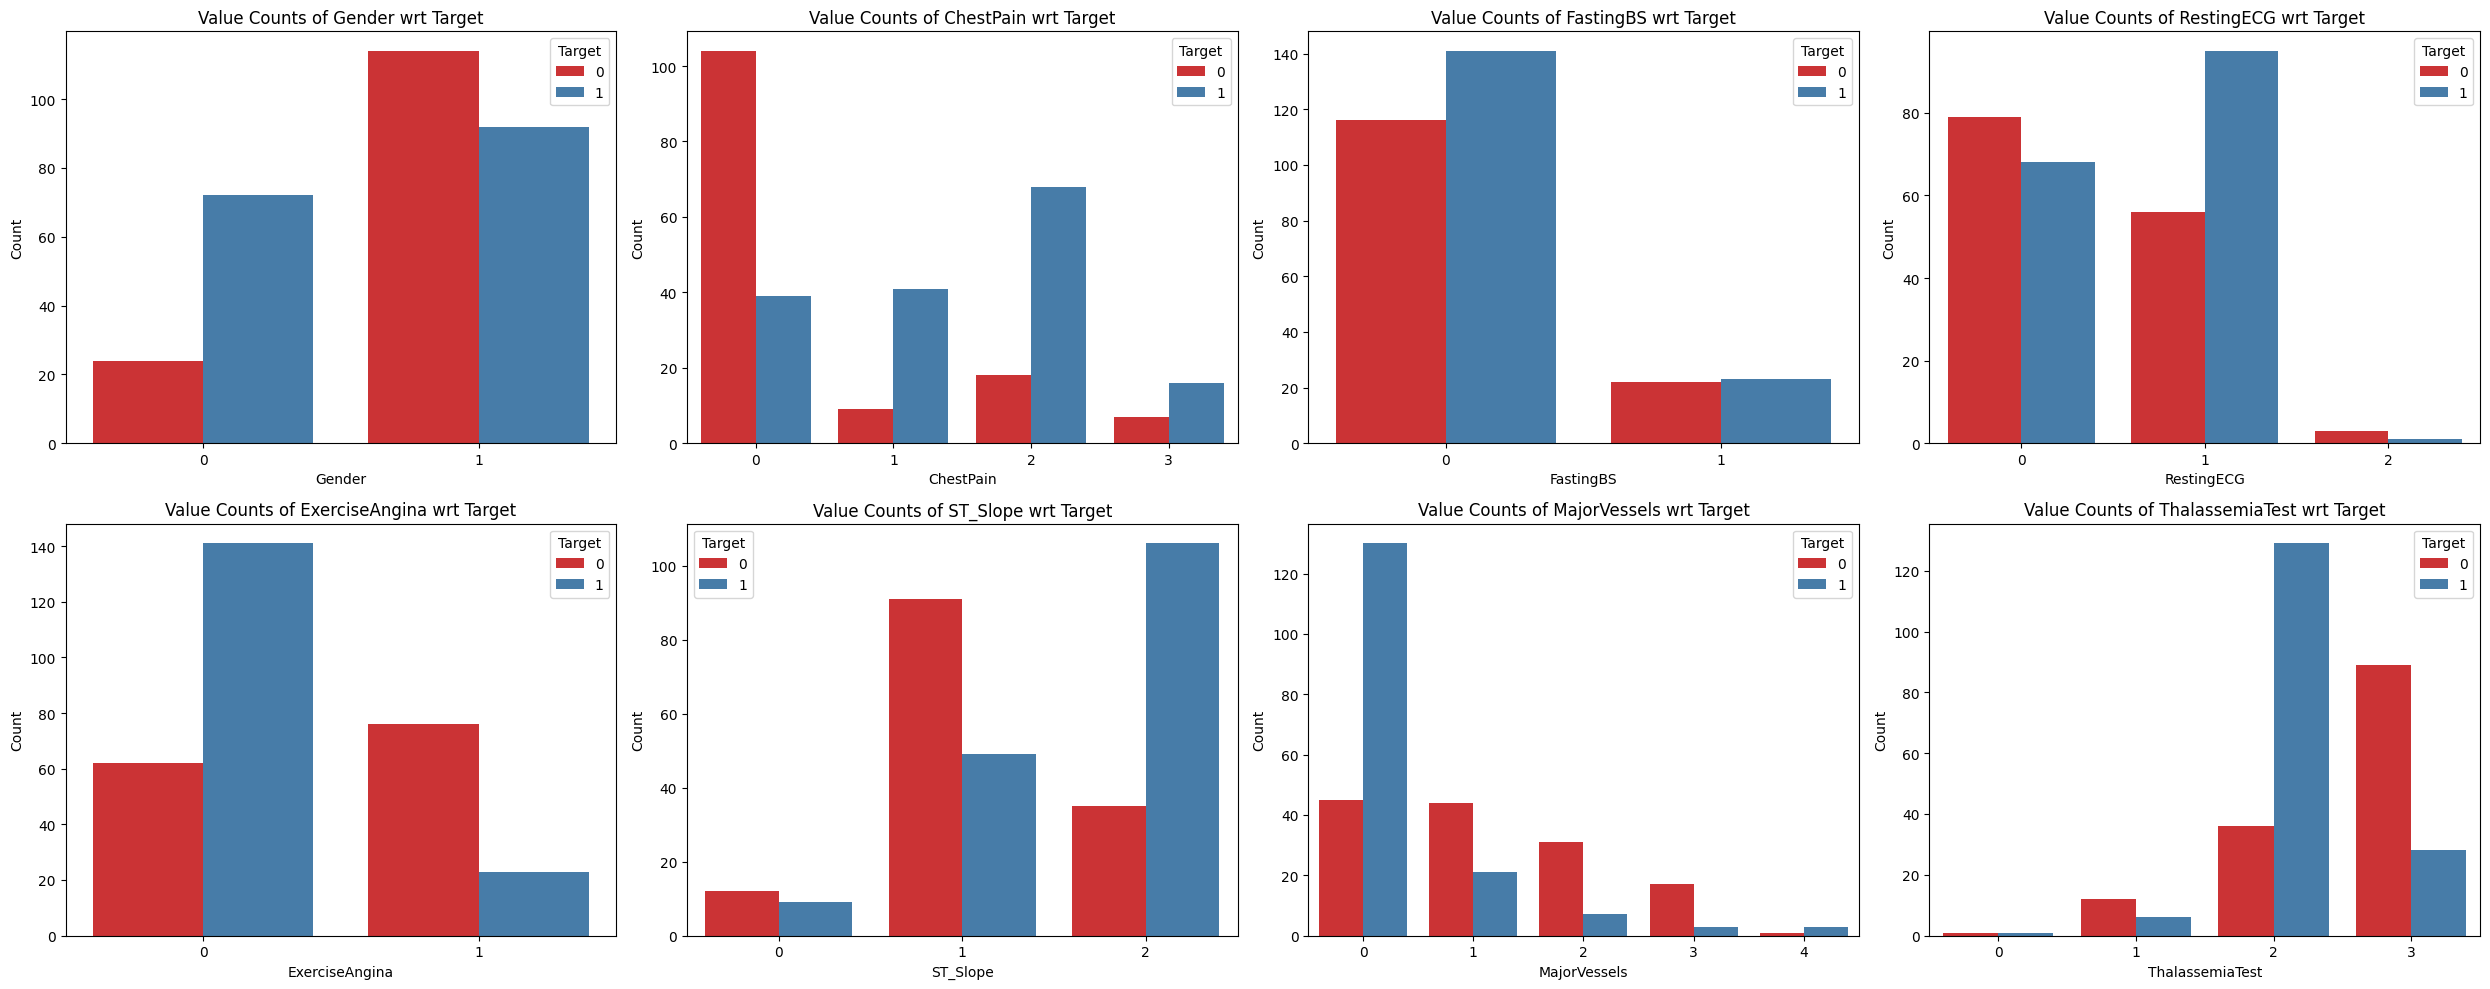

In [150]:
# Relationship b/w continuous features and target variable

plt.figure(figsize=(25,10))

for i, var in enumerate(disc_feat):
    plt.subplot(2,4, i+1)
    sns.countplot(x=df[var], hue=df['Target'], palette='Set1')
    plt.title(f'Value Counts of {var} wrt Target')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.tight_layout()

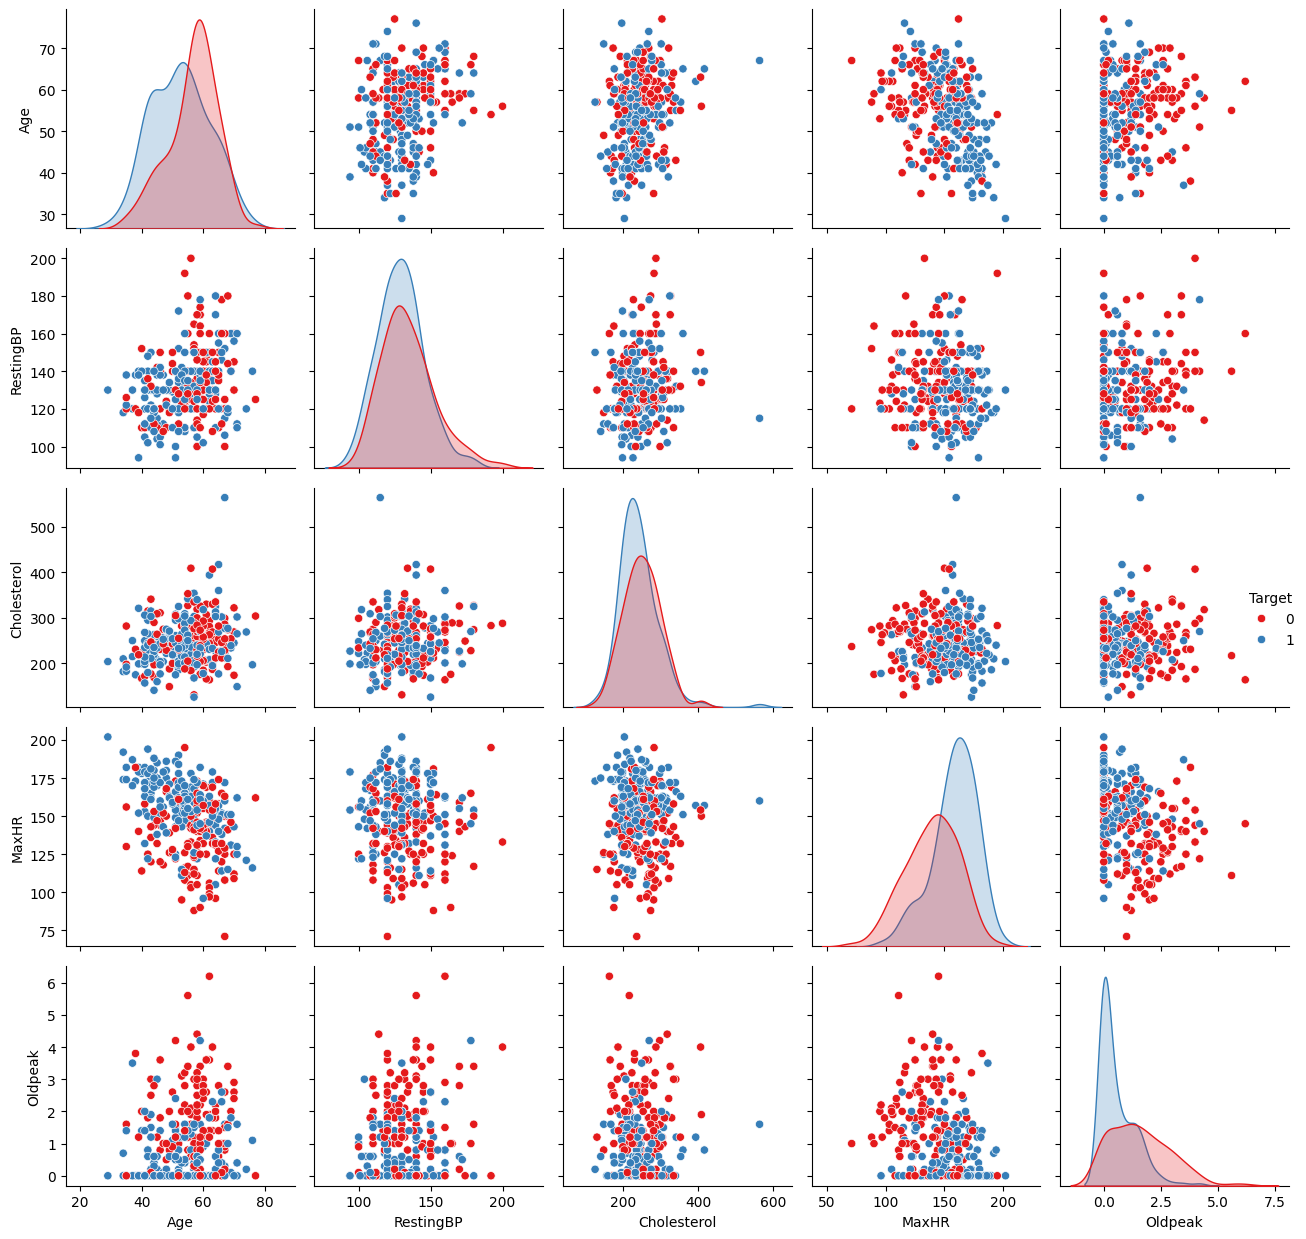

In [151]:
# Pairplot to see relationships of continuous features with target variable

sns.pairplot(df, vars=count_feat, hue='Target', palette='Set1')
plt.tight_layout()
plt.show()

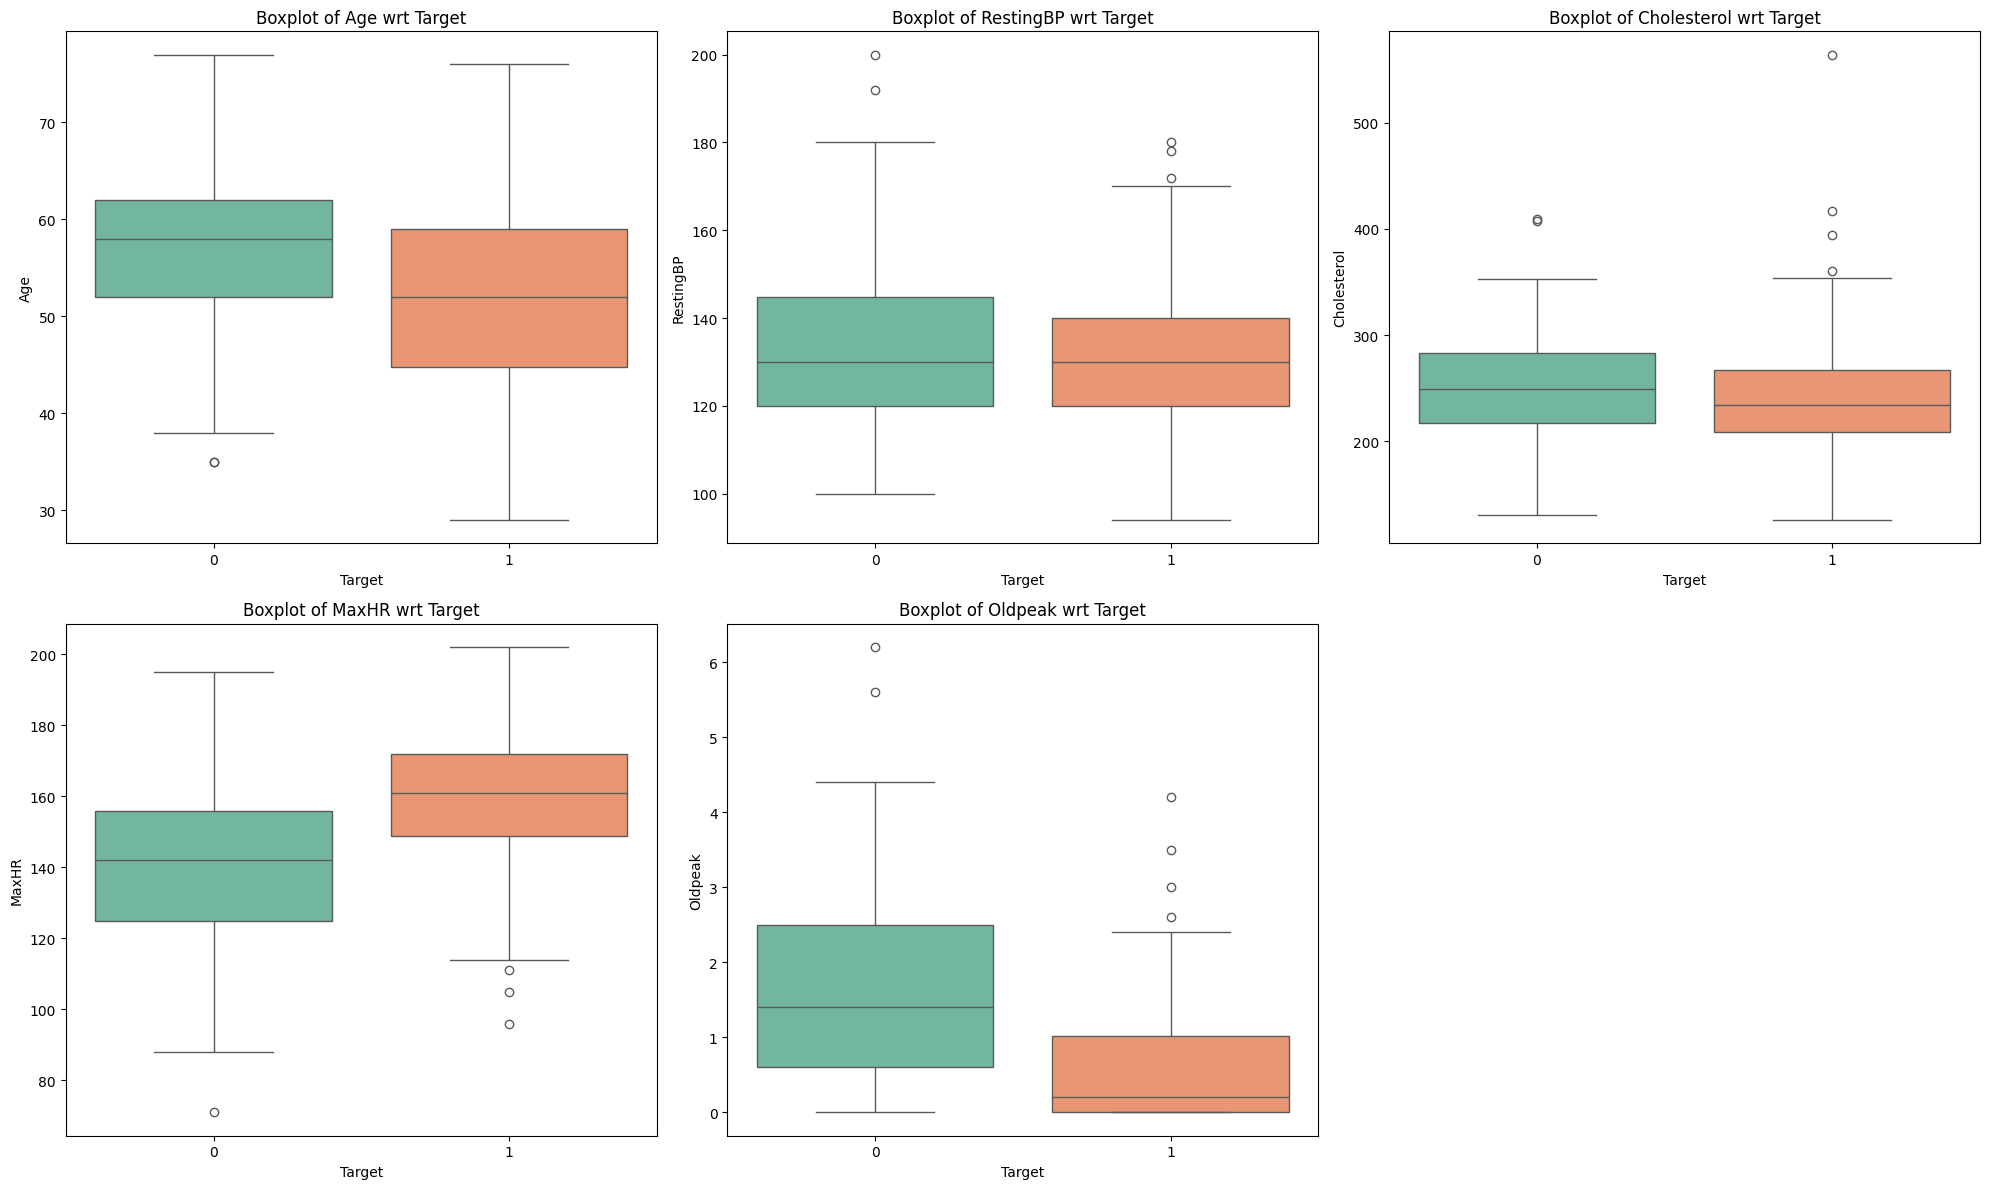

In [152]:
# Outliers in Countinuous Features wrt Target Variable

plt.figure(figsize=(20,12))
for i, var in enumerate(count_feat):
    plt.subplot(2,3, i+1)
    sns.boxplot(x=df['Target'], y=df[var], palette='Set2')
    plt.title(f'Boxplot of {var} wrt Target')
    plt.xlabel('Target')
    plt.ylabel(var)
    plt.tight_layout()

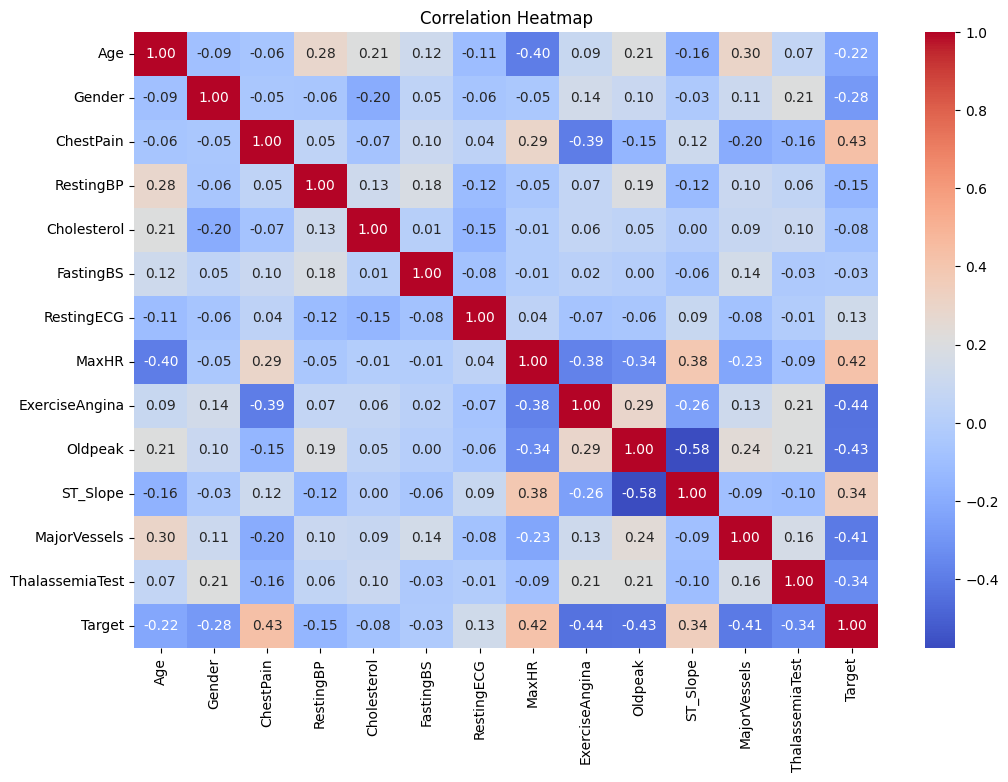

In [153]:
# Heatmap to see correlation between features
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#### Model Traing, Eavaluation and Selection

In [154]:
# Seperate features and target variable

X = df.drop('Target', axis=1)
y = df['Target']

In [155]:
# Perform Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [156]:
# Create an dictionary of regression models


models = {
    'LogisticRegression': LogisticRegression(),
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=5),
    'SVC': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'XGBClassifier': XGBClassifier(),
}

In [157]:
# Create a list for storing model performance results
results = []

In [158]:
def model_result_styler(name, accuracy_test, matrix, report, model, X_test, y_test):
    
    print(f'{"-"*50}\n||--> {name}\n{"-"*50}')
    print(f'Test Accuracy Score is: {accuracy_test}')
    print("-" * 30)
    print(f'Classification Report of Test Data:\n{report}')
    print("-" * 30)
    
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Confusion Matrix
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No PCOS', 'PCOS'], 
                yticklabels=['No PCOS', 'PCOS'], ax=ax1)
    ax1.set_xlabel('Predicted')
    ax1.set_ylabel('Actual')
    ax1.set_title(f"Confusion Matrix: {name}")

    # ROC Curve
    RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax2, color='darkorange')
    ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    ax2.set_title(f"ROC Curve: {name}")
    
    plt.tight_layout()
    plt.show()

In [159]:
# Create Model Evaluation Function

def models_evaluation(models, X_train, y_train, X_test, y_test):

    # Train models and evaluate one-by-one
    for name, model in models.items():

        # Model Training
        model.fit(X_train, y_train)

        # Model Prediction
        y_pred = model.predict(X_test)

        # Model Evaluation with Confusion Matrix, Classification Report and ROC Curve
        model_result_styler(name,
                           accuracy_test=accuracy_score(y_test, y_pred),
                           report=classification_report(y_test, y_pred),
                           matrix=confusion_matrix(y_test, y_pred),
                           model=model,
                           X_test=X_test,
                           y_test=y_test
                           )
        
        # Store the results
        results.append({
            'Model Name': name,
            'F1 Score': round(f1_score(y_test, y_pred),2),
            'ROC AUC Score': round(roc_auc_score(y_test, y_pred), 2)
        })

--------------------------------------------------
||--> LogisticRegression
--------------------------------------------------
Test Accuracy Score is: 0.8032786885245902
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

------------------------------


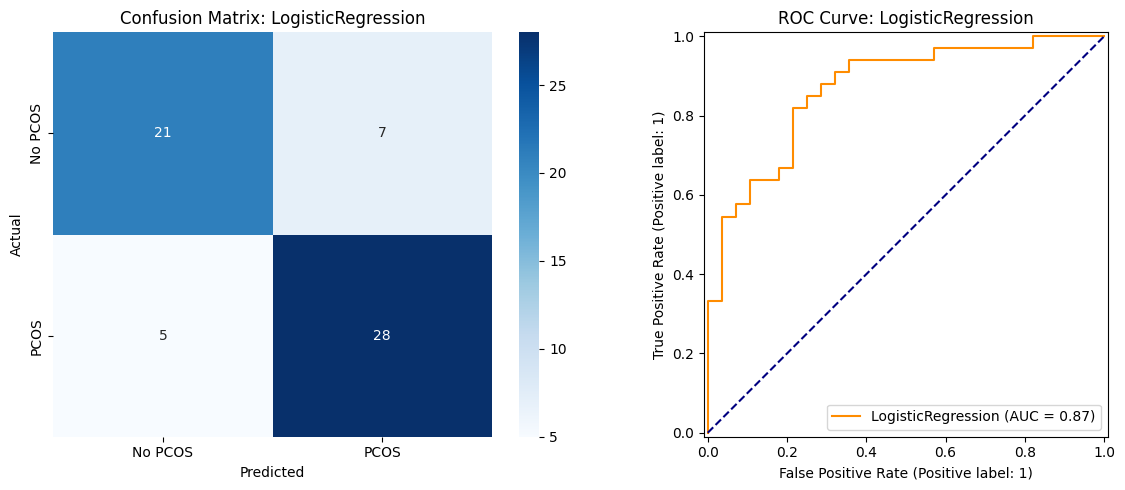

--------------------------------------------------
||--> KNeighborsClassifier
--------------------------------------------------
Test Accuracy Score is: 0.6229508196721312
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.65      0.67      0.66        33

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61

------------------------------


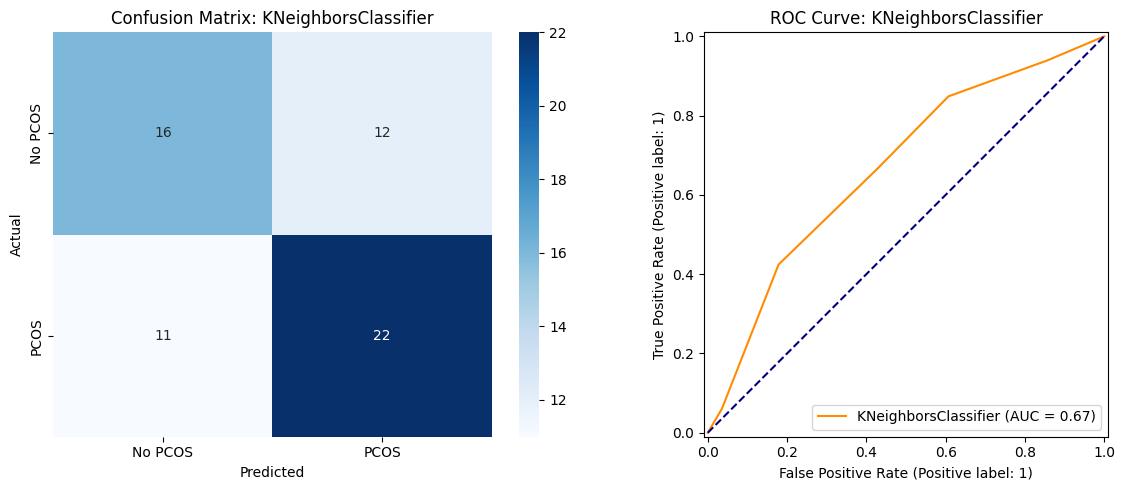

--------------------------------------------------
||--> SVC
--------------------------------------------------
Test Accuracy Score is: 0.6065573770491803
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.60      0.43      0.50        28
           1       0.61      0.76      0.68        33

    accuracy                           0.61        61
   macro avg       0.60      0.59      0.59        61
weighted avg       0.61      0.61      0.60        61

------------------------------


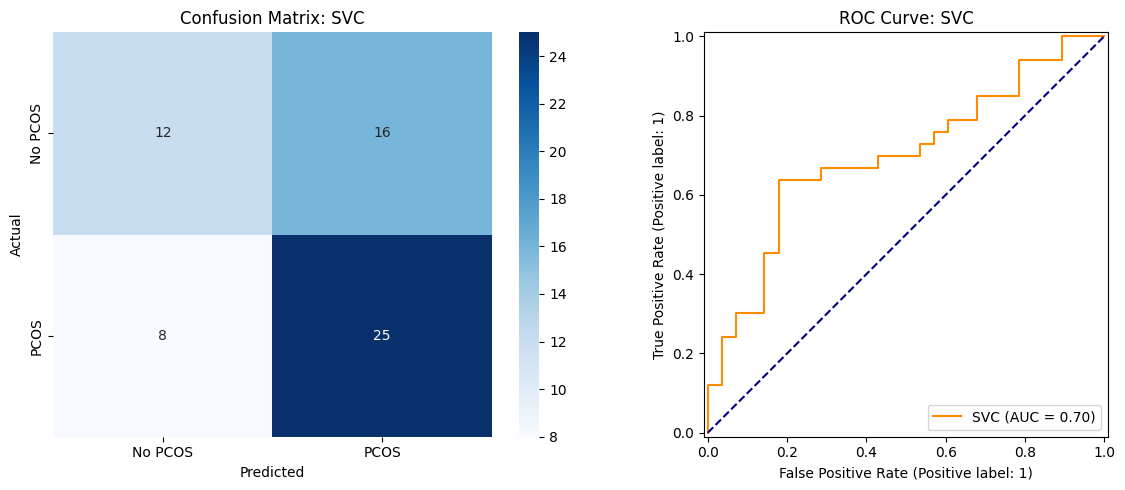

--------------------------------------------------
||--> DecisionTreeClassifier
--------------------------------------------------
Test Accuracy Score is: 0.7704918032786885
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61

------------------------------


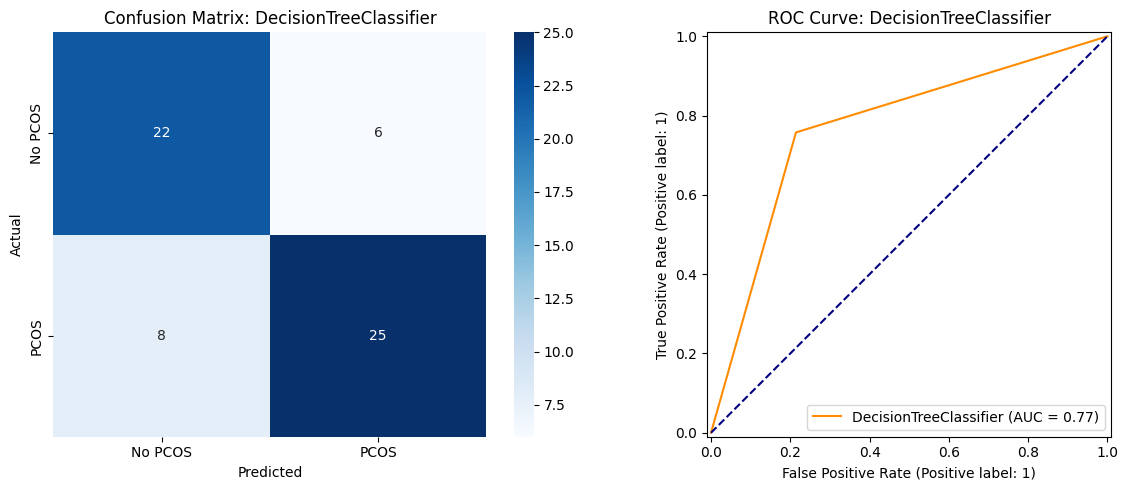

--------------------------------------------------
||--> RandomForestClassifier
--------------------------------------------------
Test Accuracy Score is: 0.7868852459016393
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.81      0.79      0.80        33

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61

------------------------------


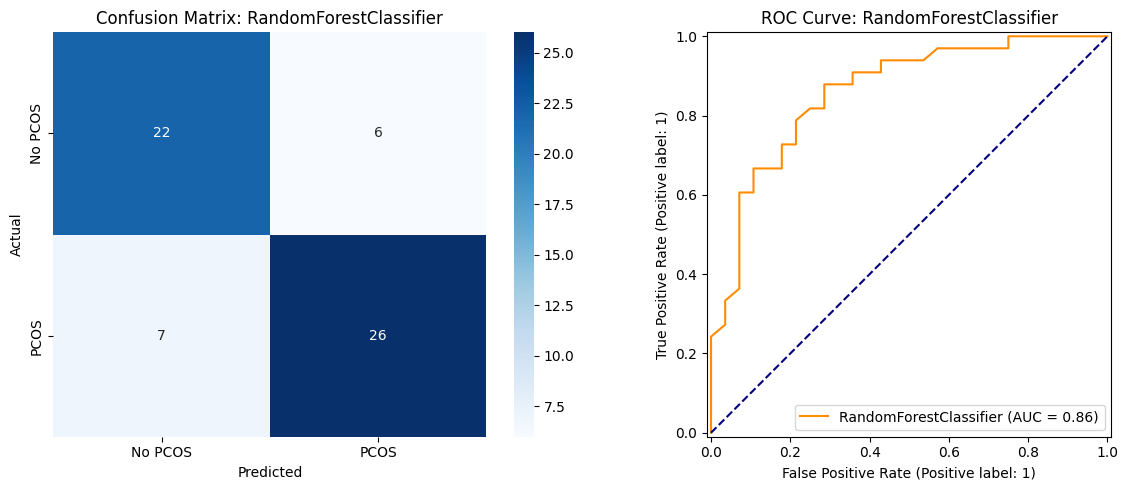

--------------------------------------------------
||--> GradientBoostingClassifier
--------------------------------------------------
Test Accuracy Score is: 0.7213114754098361
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

------------------------------


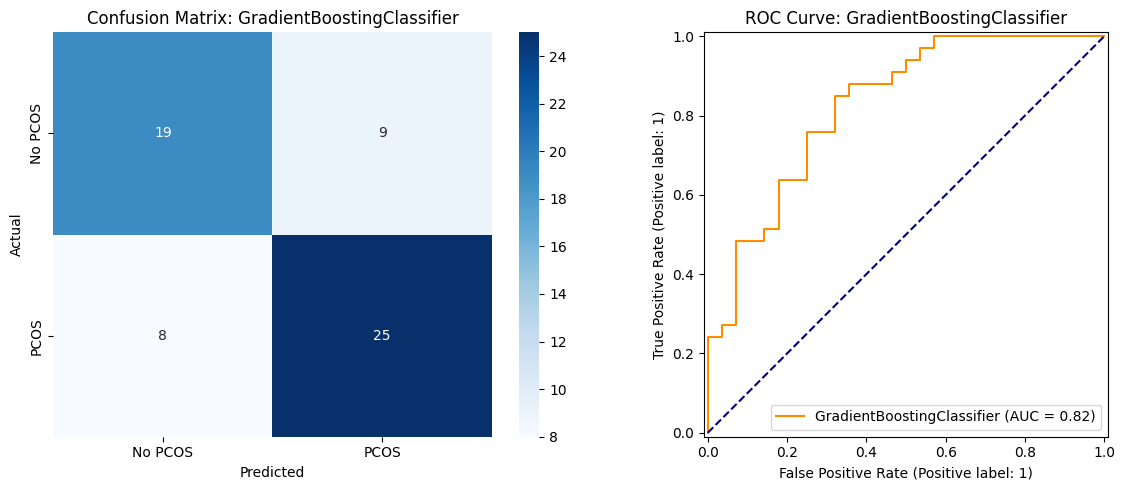

--------------------------------------------------
||--> AdaBoostClassifier
--------------------------------------------------
Test Accuracy Score is: 0.7377049180327869
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.69      0.79      0.73        28
           1       0.79      0.70      0.74        33

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61

------------------------------


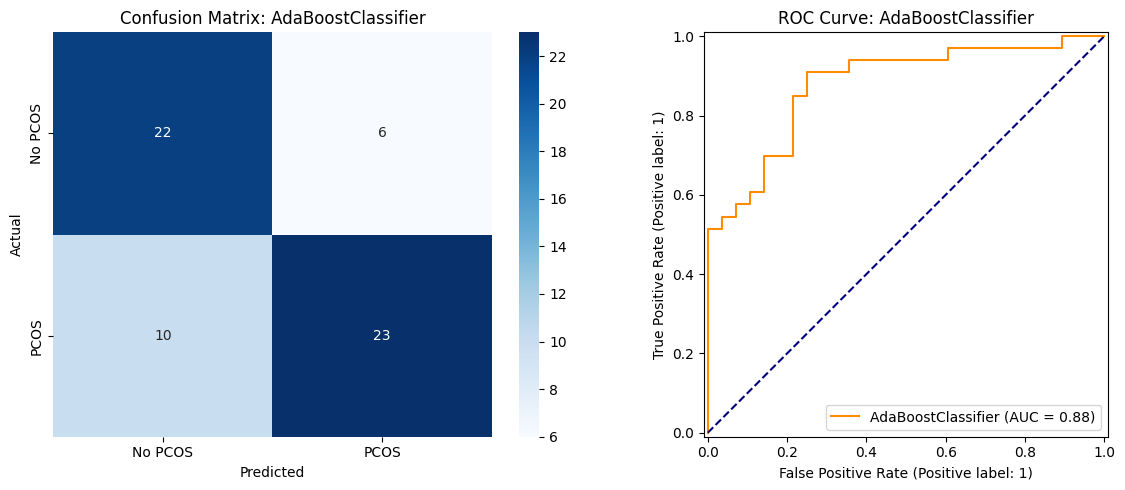

--------------------------------------------------
||--> XGBClassifier
--------------------------------------------------
Test Accuracy Score is: 0.7213114754098361
------------------------------
Classification Report of Test Data:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61

------------------------------


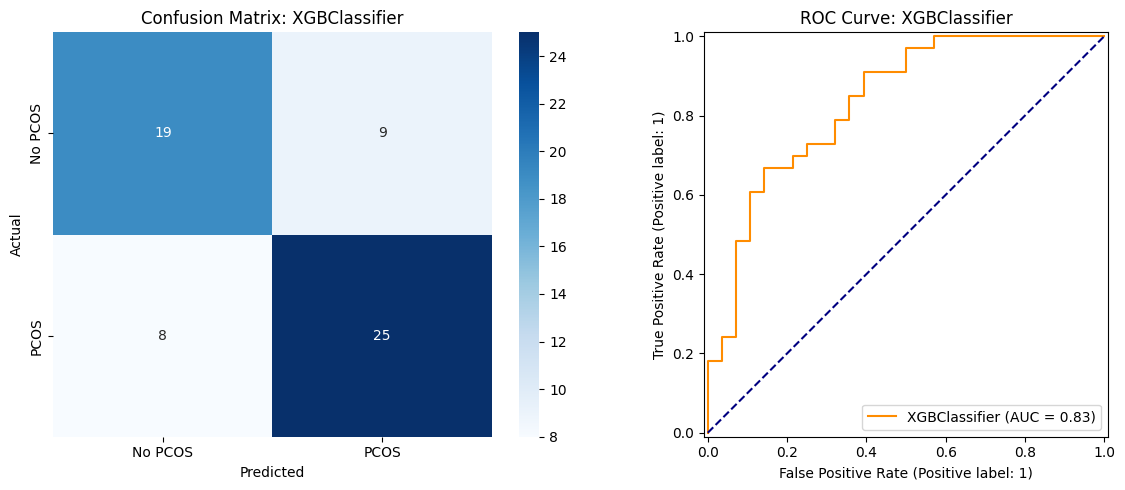

In [160]:
models_evaluation(models, X_train, y_train, X_test, y_test)

In [161]:
# Create a DataFrame to display model performance results

results_df = pd.DataFrame(results)  
results_df

,Model Name,F1 Score,ROC AUC Score
0,LogisticRegression,0.82,0.80
1,KNeighborsClassifier,0.66,0.62
2,SVC,0.68,0.59
3,DecisionTreeClassifier,0.78,0.77
4,RandomForestClassifier,0.80,0.79
5,GradientBoostingClassifier,0.75,0.72
6,AdaBoostClassifier,0.74,0.74
7,XGBClassifier,0.75,0.72


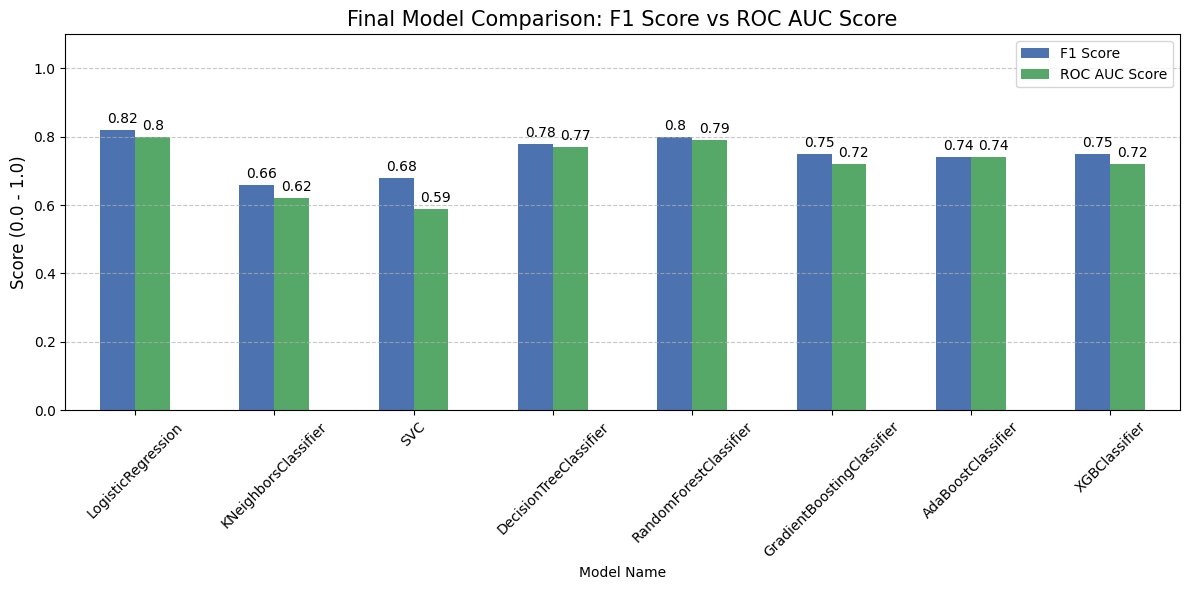

In [162]:
# Final Comparison Plot wrt F1 Score and ROC AUC Score 

results_df.set_index('Model Name', inplace=True)
    

ax = results_df.plot(kind='bar', figsize=(12, 6), color=['#4C72B0', '#55A868'])
plt.title('Final Model Comparison: F1 Score vs ROC AUC Score', fontsize=15)
plt.ylabel('Score (0.0 - 1.0)', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='upper right')


# To show values on top of bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.05, p.get_height() + 0.02))

plt.tight_layout()
plt.show()

#### Summary

After tarin and test all models, <b>Random Forest Classifier</b> perform best with maximum F1 Score (0.83) and ROC-AUC Score (0.82).